# Projeto de Previsão de Vendas

- Decidir sobre o investimento a ser realizado em divulgação é algo de suma importância para que uma empresa possa divulgar seu trabalho e prospectar novos clientes. Dessa forma, a quantidade de investimento em cada meio de mídia 

- Para resolver o problema, esse projeto utiliza da base de dados de uma empresa para prever as vendas que essa empresa terá com base nos valores utilizados para anúnciar em 3 midias diferentes: TV, Jornal e Rádio


### A execução do projeto segue as seguintes etapas:

- Passo 1: Compreenção do problema
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção de Dados
- Passo 4: Tratamento/Limpeza dos Dados
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos (Implementação de modelo preditivo)
- Passo 7: Interpretação de Resultados

### Problema

- Prever as vendas da empresa com base nos valores utilizados para anunciar em 3 tipos de midias: TV, Jornal e Rádio
- A base de dados disponível possui as segintes informações:
      - Os valores investidos para anunciar na TV, Jornal e Rádio estão em milhares de reais
      - As Vendas estão em milhões

#### Instalação de pacotes necessários:

In [1]:
#!pip install matplotlib
#!pip install seaborn
#!pip install scikit-learn

#### Leitura da base de dados:

In [2]:
import pandas as pd

tabela = pd.read_csv("Dados.csv")
display(tabela)

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


#### Análise Exploratória
- Primeiramente, verificou-se que a base de dados não necessita de tratamentos para valores nulos ou incongruentes
- Para verificar o impacto de cada tipo de anuncio nas vendas, foi plotado suas correlações: 

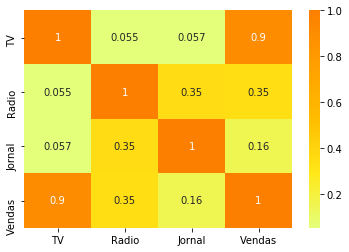

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(tabela.corr(), annot=True, cmap="Wistia")
plt.show()

# outra forma de visualizar a mesma análise:
#sns.pairplot(tabela)
#plt.show()

#### Uma vez que a base de dados já está "limpa", é realizada a separação da base de dados entre treino e teste:
 - 70% da base de dados para treino
 - 30% da base de dados para teste do modelo preditivo

In [4]:
from sklearn.model_selection import train_test_split

y = tabela["Vendas"]
x = tabela.drop("Vendas", axis=1)

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3, random_state=1)

#### Para resolver o problema, foram utilizados dois modelos:
- Regressão Linear
- RandomForest (Árvore de Decisão)

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# cria os 2 modelos preditivos:
modelo_regressaolinear = LinearRegression()
modelo_arvoredecisao = RandomForestRegressor()

# treina os 2 modelos preditivos:
modelo_regressaolinear.fit(x_treino, y_treino)
modelo_arvoredecisao.fit(x_treino, y_treino)

RandomForestRegressor()

#### Teste dos modelos preditivos:
- Para verificação do quão bem os modelos de regressão se ajustam aos dados observados, foi utilizado o R² Score 
- R² = coeficiente de determinação

In [6]:
from sklearn import metrics

# criar as previsoes
previsao_regressaolinear = modelo_regressaolinear.predict(x_teste)
previsao_arvoredecisao = modelo_arvoredecisao.predict(x_teste)

# comparar os modelos
print(metrics.r2_score(y_teste, previsao_regressaolinear))
print(metrics.r2_score(y_teste, previsao_arvoredecisao))  

0.9071151423684272
0.9625189505496442


#### Visualização das Previsões:

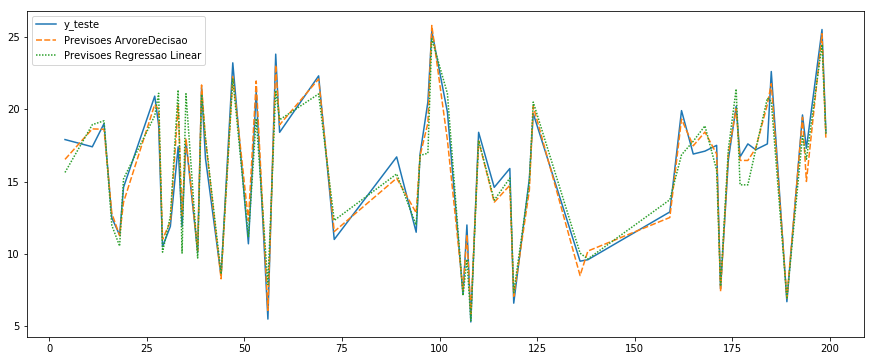

In [7]:
tabela_auxiliar = pd.DataFrame()
tabela_auxiliar["y_teste"] = y_teste
tabela_auxiliar["Previsoes ArvoreDecisao"] = previsao_arvoredecisao
tabela_auxiliar["Previsoes Regressao Linear"] = previsao_regressaolinear

plt.figure(figsize=(15,6))
sns.lineplot(data=tabela_auxiliar)
plt.show()

#### Qual a importância de cada variável para as vendas?

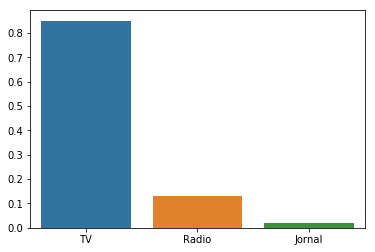

In [8]:
sns.barplot(x=x_treino.columns, y=modelo_arvoredecisao.feature_importances_)
plt.show()

# Caso queira comparar Radio com Jornal
# print(df[["Radio", "Jornal"]].sum())

#### Fazendo previsões com novos valores:

In [9]:
# Abra o arquivo "novos.csv" e adicione os valores investidos em cada tipo de anuncio (TV, Radio e Jornal)
# Os valores introduzidos serão extraidos e aplicados no modelo preditivo: 

nova_tabela = pd.read_csv("novos.csv")
#display(nova_tabela)
previsao = modelo_arvoredecisao.predict(nova_tabela)
nova_tabela["Previsão de Vendas"] = previsao
print(nova_tabela)

      TV  Radio  Jornal  Previsão de Vendas
0   23.1    3.8    69.2               7.514
1   44.5    0.0     5.1               8.456
2  170.2   45.9     0.0              20.092


#### Conclusões:
- Por meio do R² Score, observa-se que o modelo por arvore de decisão (RandomForestRegressor) se mostrou mais eficiente que o modelo por regressão linear (LinearRegression);
- Por meio da correlação e da avaliação da importância de cada feature no modelo de arvore de decisão, pode-se concluir que os investimentos em anuncios na TV são mais impactantes para as vendas obtidas. 
 